# Quick model evaluation
Uses less users than full sampling to speed up the evaluation process.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import models
import mscthesis
import pipeline
import numpy as np
import validation
import plots
import pandas as pd
import geopandas as gpd

import plotly.graph_objects as go

In [171]:
geotweets = mscthesis.read_geotweets('sweden').set_index('userid')

tweetcount = geotweets.groupby('userid').size()
geotweets = geotweets.drop(labels=tweetcount[tweetcount < 20].index)

regioncount = geotweets.groupby(['userid', 'region']).size().groupby('userid').size()
geotweets = geotweets.drop(labels=regioncount[regioncount < 2].index)

# Should be sorted by createdat
geotweets = geotweets.sort_values(by=['userid', 'createdat'])

# Select small subset of users
#random_users = geotweets.index.get_level_values(level=0).unique()[:200]
#geotweets = geotweets.loc[random_users]

In [4]:
geotweets.groupby('userid').size()

userid
5616      2130
5976       287
8981       941
32213      413
392123     617
618063      87
625323     120
633523     458
641033     360
646913     896
dtype: int64

In [5]:
home_locations = pd.read_csv("./../../dbs/sweden/homelocations.csv").set_index('userid')
home_locations = gpd.GeoDataFrame(
    home_locations,
    crs="EPSG:3006",
    geometry=gpd.points_from_xy(home_locations.x, home_locations.y),
)

In [6]:
sampers = validation.Sampers()
sampers.prepare()

Preparing scale national
Reading original data...
zones (682, 2)
odm (595984,) 221892.04955949992
Reindexing...
odm (465124,)
Calculating distances between zones...
distances (465124,)
Calculating quantiles...

Preparing scale east
Reading original data...
zones (3038, 5)
odm (9253764,) 4982573.000714299
Reindexing...
odm (9229444,)
Calculating distances between zones...
distances (9229444,)
Calculating quantiles...

Preparing scale west
Reading original data...
zones (2964, 5)
odm (8791225,) 3339597.621275899
Reindexing...
odm (8785296,)
Calculating distances between zones...
distances (8785296,)
Calculating quantiles...



In [172]:
sampler = models.Sampler(
    model=models.PreferentialReturn(
        p=0.66, 
        gamma=0.6, 
        region_sampling=models.RegionTransitionZipf(beta=0.05),
        jump_size_sampling=models.JumpSizeTrueProb(),
    ),
    n_days=7*20,
    daily_trips_sampling=models.NormalDistribution(mean=3.14, std=1.8),
    geotweets_path="",
)

In [173]:
sampler.describe()

{'model': {'p': 0.66,
  'gamma': 0.6,
  'region_sampling': {'name': 'transitionZipf', 'zipfs': 1.2, 'beta': 0.05},
  'jump_size_sampling': {'name': 'trueProb'}},
 'daily_trips_sampling': {'name': 'normal', 'mean': 3.14, 'std': 1.8},
 'n_days': 140,
 'geotweets_path': ''}

In [174]:
visits = sampler.sample(geotweets)

IPF converged after 420 iterations
(376996,)
IPF converged after 450 iterations
(22201,)
IPF converged after 170 iterations
(133956,)
IPF converged after 430 iterations
(38809,)
IPF converged after 350 iterations
(19881,)
IPF converged after 1100 iterations
(1764,)
IPF converged after 350 iterations
(2116,)
IPF converged after 360 iterations
(19321,)
IPF converged after 1090 iterations
(5041,)
IPF converged after 640 iterations
(88804,)
IPF converged after 1610 iterations
(841,)
IPF converged after 110 iterations
(2916,)
IPF converged after 390 iterations
(121801,)
IPF converged after 30 iterations
(3481,)
IPF converged after 190 iterations
(107584,)
IPF converged after 820 iterations
(11236,)
IPF converged after 740 iterations
(245025,)
IPF converged after 60 iterations
(7921,)
IPF converged after 240 iterations
(5929,)
IPF converged after 570 iterations
(40000,)
IPF converged after 90 iterations
(1444,)
IPF converged after 660 iterations
(1764,)
IPF converged after 140 iterations
(40

IPF converged after 350 iterations
(2916,)
IPF converged after 1100 iterations
(1369,)
IPF converged after 1110 iterations
(1089,)
IPF converged after 320 iterations
(9025,)
IPF converged after 10 iterations
(484,)
IPF converged after 10 iterations
(529,)
IPF converged after 280 iterations
(106929,)
IPF converged after 640 iterations
(152100,)
IPF converged after 610 iterations
(676,)
IPF converged after 20 iterations
(484,)
IPF converged after 140 iterations
(546121,)
IPF converged after 470 iterations
(52441,)
IPF converged after 20 iterations
(43681,)
IPF converged after 690 iterations
(1521,)
IPF converged after 690 iterations
(529,)
IPF converged after 530 iterations
(4225,)
IPF converged after 150 iterations
(2704,)
IPF converged after 380 iterations
(21904,)
IPF converged after 440 iterations
(19881,)
IPF converged after 10 iterations
(1444,)
IPF converged after 40 iterations
(1681,)
IPF converged after 350 iterations
(2704,)
IPF converged after 380 iterations
(14400,)
IPF conve

IPF converged after 100 iterations
(289,)
IPF converged after 60 iterations
(529,)
IPF converged after 250 iterations
(961,)
IPF converged after 90 iterations
(576,)
IPF converged after 50 iterations
(225,)
IPF converged after 200 iterations
(7569,)
IPF converged after 10 iterations
(484,)
IPF converged after 1060 iterations
(289,)
IPF converged after 610 iterations
(529,)
IPF converged after 200 iterations
(14400,)
IPF converged after 250 iterations
(2500,)
IPF converged after 390 iterations
(142129,)
IPF converged after 260 iterations
(1764,)
IPF converged after 250 iterations
(4096,)
IPF converged after 220 iterations
(3249,)
IPF converged after 290 iterations
(16900,)
IPF converged after 940 iterations
(8464,)
IPF converged after 590 iterations
(3249,)
IPF converged after 10 iterations
(529,)
IPF converged after 210 iterations
(16384,)
IPF converged after 10 iterations
(121,)
IPF converged after 780 iterations
(8100,)
IPF converged after 10 iterations
(64,)
IPF converged after 430 

IPF converged after 760 iterations
(256,)
IPF converged after 260 iterations
(1600,)
IPF converged after 340 iterations
(5929,)
IPF converged after 70 iterations
(4225,)
IPF converged after 680 iterations
(5776,)
IPF converged after 160 iterations
(1225,)
IPF converged after 290 iterations
(5041,)
IPF converged after 480 iterations
(72361,)
IPF converged after 360 iterations
(14161,)
IPF converged after 550 iterations
(6889,)
IPF converged after 10 iterations
(441,)
IPF converged after 250 iterations
(2809,)
IPF converged after 30 iterations
(900,)
IPF converged after 20 iterations
(324,)
IPF converged after 520 iterations
(28224,)
IPF converged after 50 iterations
(900,)
IPF converged after 300 iterations
(40804,)
IPF converged after 690 iterations
(400,)
IPF converged after 930 iterations
(27889,)
IPF converged after 270 iterations
(13225,)
IPF converged after 850 iterations
(15625,)
IPF converged after 460 iterations
(17161,)
IPF converged after 10 iterations
(64,)
IPF converged aft

IPF converged after 830 iterations
(38809,)
IPF converged after 1210 iterations
(9216,)
IPF converged after 50 iterations
(529,)
IPF converged after 1130 iterations
(361,)
IPF converged after 400 iterations
(69696,)
IPF converged after 70 iterations
(3721,)
IPF converged after 380 iterations
(302500,)
IPF converged after 170 iterations
(21316,)
IPF converged after 310 iterations
(11449,)
IPF converged after 130 iterations
(68644,)
IPF converged after 170 iterations
(3721,)
IPF converged after 500 iterations
(34969,)
IPF converged after 540 iterations
(7225,)
IPF converged after 560 iterations
(45369,)
IPF converged after 580 iterations
(17424,)
IPF converged after 40 iterations
(169,)
IPF converged after 190 iterations
(48400,)
IPF converged after 230 iterations
(400,)
IPF converged after 300 iterations
(18769,)
IPF converged after 390 iterations
(1936,)
IPF converged after 470 iterations
(2916,)
IPF converged after 730 iterations
(4356,)
IPF converged after 110 iterations
(6084,)
IPF 

IPF converged after 170 iterations
(7569,)
IPF converged after 270 iterations
(7569,)
IPF converged after 360 iterations
(17161,)
IPF converged after 180 iterations
(40401,)
IPF converged after 10 iterations
(100,)
IPF converged after 350 iterations
(12544,)
IPF converged after 90 iterations
(6889,)
IPF converged after 800 iterations
(19044,)
IPF converged after 940 iterations
(31329,)
IPF converged after 100 iterations
(24336,)
IPF converged after 440 iterations
(133956,)
IPF converged after 360 iterations
(121,)
IPF converged after 480 iterations
(22500,)
IPF converged after 220 iterations
(4225,)
IPF converged after 2060 iterations
(1225,)
IPF converged after 10 iterations
(1156,)
IPF converged after 720 iterations
(96100,)
IPF converged after 10 iterations
(81,)
IPF converged after 380 iterations
(10201,)
IPF converged after 670 iterations
(51984,)
IPF converged after 380 iterations
(12321,)
IPF converged after 410 iterations
(3481,)
IPF converged after 110 iterations
(1089,)
IPF c

IPF converged after 600 iterations
(4225,)
IPF converged after 540 iterations
(900,)
IPF converged after 740 iterations
(2116,)
IPF converged after 170 iterations
(961,)
IPF converged after 1110 iterations
(441,)
IPF converged after 490 iterations
(21025,)
IPF converged after 1070 iterations
(400,)
IPF converged after 30 iterations
(14641,)
IPF converged after 860 iterations
(361,)
IPF converged after 300 iterations
(14884,)
IPF converged after 910 iterations
(343396,)
IPF converged after 730 iterations
(676,)
IPF converged after 10 iterations
(4,)
IPF converged after 430 iterations
(4900,)
IPF converged after 10 iterations
(3364,)
IPF converged after 1340 iterations
(2304,)
IPF converged after 10 iterations
(225,)
IPF converged after 10 iterations
(441,)
IPF converged after 790 iterations
(32400,)
IPF converged after 230 iterations
(841,)
IPF converged after 10 iterations
(9,)
IPF converged after 230 iterations
(1296,)
IPF converged after 720 iterations
(13456,)
IPF converged after 22

IPF converged after 280 iterations
(17424,)
IPF converged after 440 iterations
(21316,)
IPF converged after 200 iterations
(44944,)
IPF converged after 120 iterations
(80089,)
IPF converged after 340 iterations
(441,)
IPF converged after 1040 iterations
(33489,)
IPF converged after 510 iterations
(8836,)
IPF converged after 580 iterations
(2116,)
IPF converged after 180 iterations
(26896,)
IPF converged after 10 iterations
(1156,)
IPF converged after 420 iterations
(9409,)
IPF converged after 870 iterations
(1156,)
IPF converged after 470 iterations
(2116,)
IPF converged after 440 iterations
(35721,)
IPF converged after 510 iterations
(13924,)
IPF converged after 280 iterations
(2116,)
IPF converged after 700 iterations
(53824,)
IPF converged after 590 iterations
(103041,)
IPF converged after 10 iterations
(64,)
IPF converged after 780 iterations
(9801,)
IPF converged after 100 iterations
(28224,)
IPF converged after 220 iterations
(10000,)
IPF converged after 120 iterations
(6889,)
IP

IPF converged after 180 iterations
(1849,)
IPF converged after 690 iterations
(361,)
IPF converged after 410 iterations
(784,)
IPF converged after 500 iterations
(194481,)
IPF converged after 160 iterations
(35721,)
IPF converged after 110 iterations
(4489,)
IPF converged after 10 iterations
(16,)
IPF converged after 20 iterations
(324,)
IPF converged after 330 iterations
(6889,)
IPF converged after 570 iterations
(65025,)
IPF converged after 660 iterations
(64,)
IPF converged after 20 iterations
(169,)
IPF converged after 840 iterations
(1024,)
IPF converged after 140 iterations
(1225,)
IPF converged after 60 iterations
(7744,)
IPF converged after 10 iterations
(324,)
IPF converged after 390 iterations
(17424,)
IPF converged after 1090 iterations
(5476,)
IPF converged after 300 iterations
(64,)
IPF converged after 10 iterations
(324,)
IPF converged after 290 iterations
(6241,)
IPF converged after 30 iterations
(441,)
IPF converged after 670 iterations
(6400,)
IPF converged after 620 i

IPF converged after 450 iterations
(6400,)
IPF converged after 980 iterations
(1444,)
IPF converged after 790 iterations
(14641,)
IPF converged after 370 iterations
(3969,)
IPF converged after 450 iterations
(2209,)
IPF converged after 370 iterations
(57121,)
IPF converged after 310 iterations
(784,)
IPF converged after 570 iterations
(24964,)
IPF converged after 90 iterations
(14641,)
IPF converged after 1270 iterations
(7225,)
IPF converged after 230 iterations
(356409,)
IPF converged after 360 iterations
(361,)
IPF converged after 640 iterations
(7569,)
IPF converged after 120 iterations
(66564,)
IPF converged after 470 iterations
(7921,)
IPF converged after 410 iterations
(1681,)
IPF converged after 90 iterations
(361,)
IPF converged after 70 iterations
(1764,)
IPF converged after 80 iterations
(900,)
IPF converged after 400 iterations
(26244,)
IPF converged after 10 iterations
(625,)
IPF converged after 100 iterations
(784,)
IPF converged after 610 iterations
(256,)
IPF converged 

IPF converged after 10 iterations
(4,)
IPF converged after 420 iterations
(43264,)
IPF converged after 750 iterations
(289,)
IPF converged after 10 iterations
(36,)
IPF converged after 690 iterations
(1296,)
IPF converged after 60 iterations
(1296,)
IPF converged after 580 iterations
(9604,)
IPF converged after 380 iterations
(4900,)
IPF converged after 140 iterations
(6400,)
IPF converged after 10 iterations
(100,)
IPF converged after 420 iterations
(1296,)
IPF converged after 240 iterations
(60025,)
IPF converged after 1230 iterations
(625,)
IPF converged after 450 iterations
(4761,)
IPF converged after 340 iterations
(38025,)
IPF converged after 420 iterations
(54756,)
IPF converged after 400 iterations
(10609,)
IPF converged after 880 iterations
(784,)
IPF converged after 480 iterations
(9025,)
IPF converged after 440 iterations
(4356,)
IPF converged after 650 iterations
(30976,)
IPF converged after 1200 iterations
(289,)
IPF converged after 120 iterations
(86436,)
IPF converged af

IPF converged after 310 iterations
(10816,)
IPF converged after 690 iterations
(5329,)
IPF converged after 270 iterations
(9409,)
IPF converged after 390 iterations
(30976,)
IPF converged after 250 iterations
(289,)
IPF converged after 110 iterations
(2304,)
IPF converged after 30 iterations
(841,)
IPF converged after 590 iterations
(8281,)
IPF converged after 90 iterations
(5625,)
IPF converged after 530 iterations
(6241,)
IPF converged after 30 iterations
(100,)
IPF converged after 70 iterations
(100,)
IPF converged after 10 iterations
(16,)
IPF converged after 360 iterations
(4489,)
IPF converged after 30 iterations
(81,)
IPF converged after 300 iterations
(29929,)
IPF converged after 360 iterations
(8100,)
IPF converged after 680 iterations
(10609,)
IPF converged after 650 iterations
(2809,)
IPF converged after 10 iterations
(1225,)
IPF converged after 110 iterations
(7396,)
IPF converged after 1040 iterations
(225,)
IPF converged after 410 iterations
(625,)
IPF converged after 630

IPF converged after 30 iterations
(256,)
IPF converged after 60 iterations
(361,)
IPF converged after 890 iterations
(169,)
IPF converged after 90 iterations
(6400,)
IPF converged after 920 iterations
(1936,)
IPF converged after 450 iterations
(3844,)
IPF converged after 470 iterations
(131044,)
IPF converged after 460 iterations
(4900,)
IPF converged after 890 iterations
(441,)
IPF converged after 720 iterations
(625,)
IPF converged after 140 iterations
(2809,)
IPF converged after 700 iterations
(1849,)
IPF converged after 20 iterations
(1369,)
IPF converged after 110 iterations
(5041,)
IPF converged after 750 iterations
(11881,)
IPF converged after 370 iterations
(9604,)
IPF converged after 440 iterations
(169,)
IPF converged after 20 iterations
(1444,)
IPF converged after 1060 iterations
(2209,)
IPF converged after 750 iterations
(26244,)
IPF converged after 320 iterations
(441,)
IPF converged after 230 iterations
(5041,)
IPF converged after 30 iterations
(64,)
IPF converged after 3

IPF converged after 290 iterations
(4225,)
IPF converged after 1260 iterations
(100,)
IPF converged after 750 iterations
(400,)
IPF converged after 890 iterations
(4900,)
IPF converged after 600 iterations
(841,)
IPF converged after 470 iterations
(6241,)
IPF converged after 50 iterations
(2601,)
IPF converged after 1110 iterations
(139876,)
IPF converged after 540 iterations
(6724,)
IPF converged after 250 iterations
(12544,)
IPF converged after 30 iterations
(2025,)
IPF converged after 440 iterations
(7744,)
IPF converged after 450 iterations
(2401,)
IPF converged after 50 iterations
(81,)
IPF converged after 290 iterations
(961,)
done with 2500
IPF converged after 510 iterations
(1849,)
IPF converged after 720 iterations
(11449,)
IPF converged after 760 iterations
(1936,)
IPF converged after 170 iterations
(1024,)
IPF converged after 980 iterations
(16641,)
IPF converged after 10 iterations
(100,)
IPF converged after 850 iterations
(9216,)
IPF converged after 250 iterations
(8281,)


IPF converged after 730 iterations
(8649,)
IPF converged after 30 iterations
(529,)
IPF converged after 160 iterations
(15376,)
IPF converged after 220 iterations
(67081,)
IPF converged after 550 iterations
(289,)
IPF converged after 640 iterations
(10816,)
IPF converged after 10 iterations
(676,)
IPF converged after 410 iterations
(22201,)
IPF converged after 10 iterations
(81,)
IPF converged after 10 iterations
(81,)
IPF converged after 10 iterations
(5184,)
IPF converged after 180 iterations
(529,)
IPF converged after 20 iterations
(1369,)
IPF converged after 470 iterations
(34225,)
IPF converged after 520 iterations
(529,)
IPF converged after 550 iterations
(1521,)
IPF converged after 440 iterations
(29929,)
IPF converged after 330 iterations
(9025,)
IPF converged after 650 iterations
(196,)
IPF converged after 620 iterations
(1024,)
IPF converged after 240 iterations
(77841,)
IPF converged after 240 iterations
(7744,)
IPF converged after 30 iterations
(64,)
IPF converged after 770

IPF converged after 160 iterations
(2704,)
IPF converged after 350 iterations
(1444,)
IPF converged after 560 iterations
(3249,)
IPF converged after 350 iterations
(3969,)
IPF converged after 510 iterations
(13689,)
IPF converged after 670 iterations
(73441,)
IPF converged after 40 iterations
(1089,)
IPF converged after 10 iterations
(169,)
IPF converged after 110 iterations
(961,)
IPF converged after 680 iterations
(1024,)
IPF converged after 410 iterations
(6241,)
IPF converged after 620 iterations
(6241,)
IPF converged after 510 iterations
(26569,)
IPF converged after 270 iterations
(121,)
IPF converged after 180 iterations
(5329,)
IPF converged after 300 iterations
(12544,)
IPF converged after 580 iterations
(900,)
IPF converged after 1040 iterations
(1681,)
IPF converged after 200 iterations
(61009,)
IPF converged after 520 iterations
(4096,)
IPF converged after 790 iterations
(16641,)
IPF converged after 590 iterations
(2116,)
IPF converged after 170 iterations
(484,)
IPF converg

IPF converged after 650 iterations
(16129,)
IPF converged after 680 iterations
(6241,)
IPF converged after 530 iterations
(8464,)
IPF converged after 1040 iterations
(6400,)
IPF converged after 1030 iterations
(961,)
IPF converged after 10 iterations
(4,)
IPF converged after 110 iterations
(289,)
IPF converged after 290 iterations
(4356,)
IPF converged after 450 iterations
(11236,)
IPF converged after 760 iterations
(3364,)
IPF converged after 460 iterations
(2116,)
IPF converged after 550 iterations
(1444,)
IPF converged after 1020 iterations
(10000,)
IPF converged after 420 iterations
(3844,)
IPF converged after 10 iterations
(16,)
IPF converged after 920 iterations
(57600,)
IPF converged after 190 iterations
(900,)
IPF converged after 500 iterations
(6400,)
IPF converged after 270 iterations
(1369,)
IPF converged after 1000 iterations
(3025,)
IPF converged after 20 iterations
(676,)
IPF converged after 400 iterations
(10000,)
IPF converged after 1740 iterations
(361,)
IPF converged 

IPF converged after 380 iterations
(23104,)
IPF converged after 690 iterations
(14161,)
IPF converged after 500 iterations
(3136,)
IPF converged after 110 iterations
(1024,)
IPF converged after 230 iterations
(100,)
IPF converged after 10 iterations
(1600,)
IPF converged after 650 iterations
(3600,)
IPF converged after 20 iterations
(361,)
IPF converged after 750 iterations
(1849,)
IPF converged after 640 iterations
(6724,)
IPF converged after 860 iterations
(34596,)
IPF converged after 1040 iterations
(441,)
IPF converged after 360 iterations
(2209,)
IPF converged after 1560 iterations
(16,)
IPF converged after 20 iterations
(289,)
IPF converged after 40 iterations
(289,)
IPF converged after 530 iterations
(5625,)
IPF converged after 400 iterations
(256,)
IPF converged after 340 iterations
(5476,)
IPF converged after 110 iterations
(729,)
IPF converged after 130 iterations
(225,)
IPF converged after 640 iterations
(68121,)
IPF converged after 550 iterations
(2116,)
IPF converged after

IPF converged after 630 iterations
(121,)
IPF converged after 430 iterations
(2209,)
IPF converged after 80 iterations
(2209,)
IPF converged after 790 iterations
(484,)
IPF converged after 10 iterations
(289,)
IPF converged after 400 iterations
(576,)
IPF converged after 110 iterations
(2809,)
IPF converged after 860 iterations
(529,)
IPF converged after 400 iterations
(13456,)
IPF converged after 90 iterations
(6241,)
IPF converged after 210 iterations
(13225,)
IPF converged after 500 iterations
(6241,)
IPF converged after 710 iterations
(3600,)
IPF converged after 630 iterations
(134689,)
IPF converged after 580 iterations
(841,)
IPF converged after 330 iterations
(8649,)
IPF converged after 670 iterations
(576,)
IPF converged after 420 iterations
(155236,)
IPF converged after 20 iterations
(225,)
IPF converged after 470 iterations
(7921,)
IPF converged after 30 iterations
(2809,)
IPF converged after 150 iterations
(39204,)
IPF converged after 10 iterations
(784,)
IPF converged after

IPF converged after 750 iterations
(11236,)
IPF converged after 20 iterations
(100,)
IPF converged after 590 iterations
(2601,)
IPF converged after 800 iterations
(12769,)
IPF converged after 50 iterations
(1849,)
IPF converged after 900 iterations
(1089,)
IPF converged after 10 iterations
(3600,)
IPF converged after 520 iterations
(1369,)
IPF converged after 430 iterations
(1024,)
IPF converged after 30 iterations
(49,)
IPF converged after 290 iterations
(5476,)
IPF converged after 830 iterations
(3721,)
IPF converged after 20 iterations
(1369,)
IPF converged after 1030 iterations
(1156,)
IPF converged after 10 iterations
(4761,)
IPF converged after 10 iterations
(36,)
IPF converged after 550 iterations
(3481,)
IPF converged after 70 iterations
(441,)
IPF converged after 420 iterations
(3249,)
IPF converged after 580 iterations
(484,)
IPF converged after 10 iterations
(289,)
IPF converged after 10 iterations
(1444,)
IPF converged after 10 iterations
(64,)
IPF converged after 980 itera

IPF converged after 10 iterations
(36,)
IPF converged after 440 iterations
(11664,)
IPF converged after 430 iterations
(2401,)
IPF converged after 260 iterations
(1089,)
IPF converged after 10 iterations
(16,)
IPF converged after 100 iterations
(625,)
IPF converged after 200 iterations
(121,)
IPF converged after 10 iterations
(144,)
IPF converged after 610 iterations
(900,)
IPF converged after 700 iterations
(4489,)
IPF converged after 520 iterations
(144,)
IPF converged after 360 iterations
(289,)
IPF converged after 20 iterations
(49,)
IPF converged after 30 iterations
(144,)
IPF converged after 260 iterations
(3364,)
IPF converged after 10 iterations
(4,)
IPF converged after 10 iterations
(64,)
IPF converged after 180 iterations
(100,)
IPF converged after 70 iterations
(2025,)
IPF converged after 20 iterations
(8464,)
IPF converged after 30 iterations
(225,)
IPF converged after 110 iterations
(2916,)
IPF converged after 390 iterations
(2116,)
IPF converged after 190 iterations
(1024

In [175]:
converted_visits = sampers.convert(visits)
converted_baseline = sampers.convert(models.geotweets_to_visits(geotweets))

Converting visits to GeoDataFrame...
Converting CRS...
epsg:3006
Converting visits to GeoDataFrame...
Converting CRS...
epsg:3006


In [176]:
def quick_eval(scale, cnv_visits, cnv_baseline, home_locations, sampers):
    dm = validation.DistanceMetrics()
    sparse_odm = sampers.align(
        scale=scale,
        home_locations=home_locations,
        visits=cnv_visits,
    )
    sparse_odm = sampers.distance_cut(scale, sparse_odm)
    sparse_odm_baseline = sampers.align(
        scale=scale,
        home_locations=home_locations,
        visits=cnv_baseline,
    )
    sparse_odm_baseline = sampers.distance_cut(scale, sparse_odm_baseline)
    distance_metrics = dm.compute(
        sampers.quantile_groups[scale],
        [
            sparse_odm,
            sparse_odm_baseline,
            sampers.odm[scale],
        ],
        ['model', 'baseline', 'sampers']
    )
    print(((distance_metrics.model_mean.fillna(0) - distance_metrics.sampers_mean)**2).mean())
    _ = plots.plot_distance_metrics(distance_metrics, ['model', 'baseline', 'sampers'], show_norm=False)

# National

Not bboxing national
Aligning region-visits to Sampers zones...
removed 506 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
117996 visits left after alignment
Not bboxing national
Aligning region-visits to Sampers zones...
removed 15008 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
73307 visits left after alignment
2.4217621785589036e-11


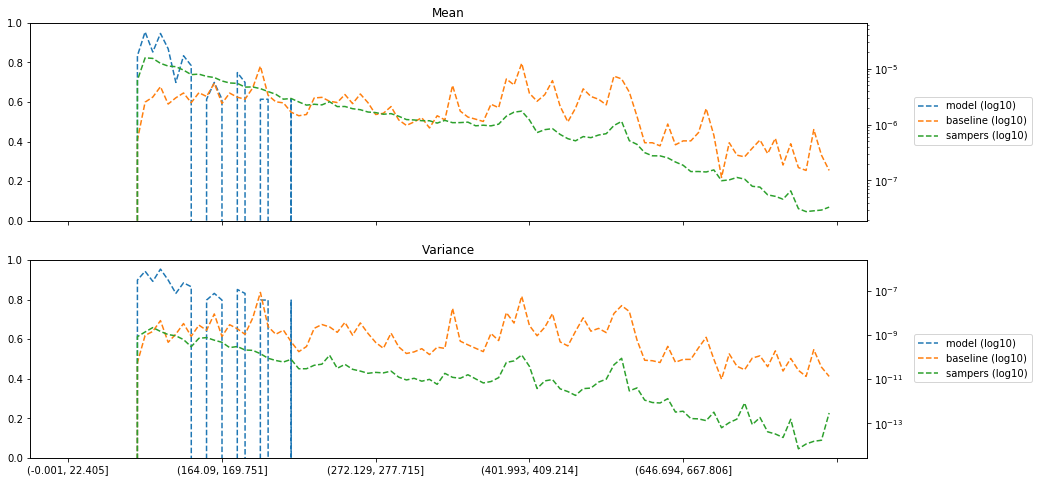

In [170]:
quick_eval("national", converted_visits, converted_baseline, home_locations, sampers)

Not bboxing national
Aligning region-visits to Sampers zones...
removed 6098 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
2289774 visits left after alignment
Not bboxing national
Aligning region-visits to Sampers zones...
removed 158301 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
1131119 visits left after alignment
2.2839428038112057e-11


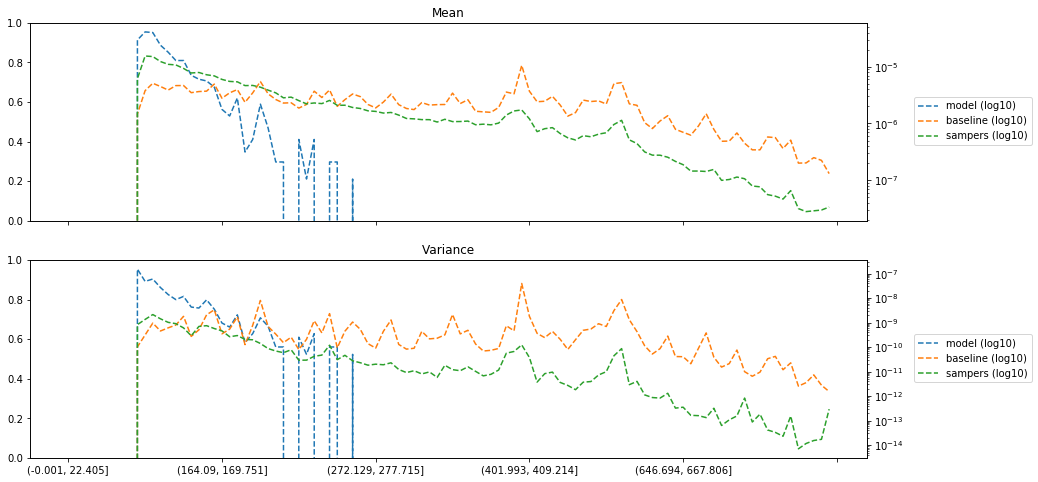

In [177]:
quick_eval("national", converted_visits, converted_baseline, home_locations, sampers)

# East

removed 2925 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 110 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
2797 visits left after alignment
removed 2076 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 731 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
3502 visits left after alignment
4.3526402099853404e-14


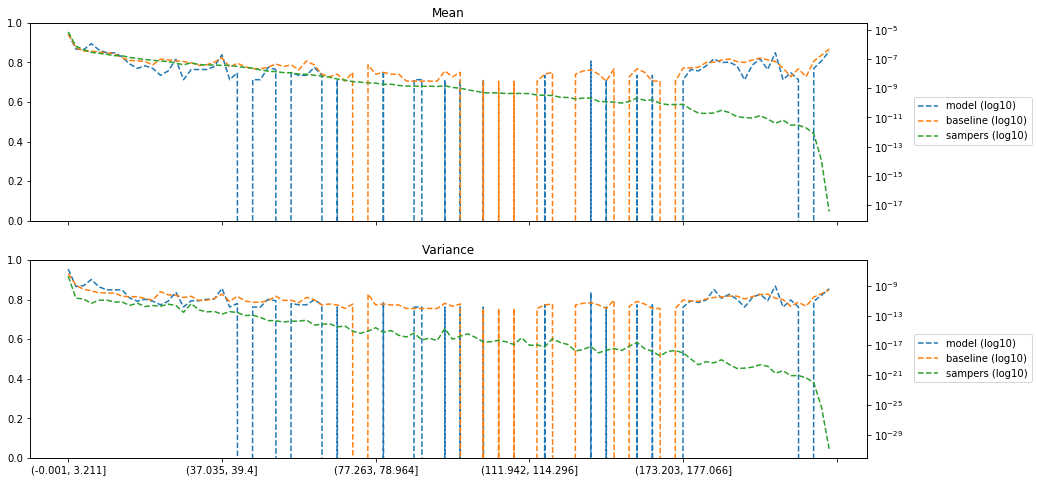

In [146]:
quick_eval("east", converted_visits, converted_baseline, home_locations, sampers)

removed 2868 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 3 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
2912 visits left after alignment
removed 2076 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 731 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
3502 visits left after alignment
2.5058751212475343e-14


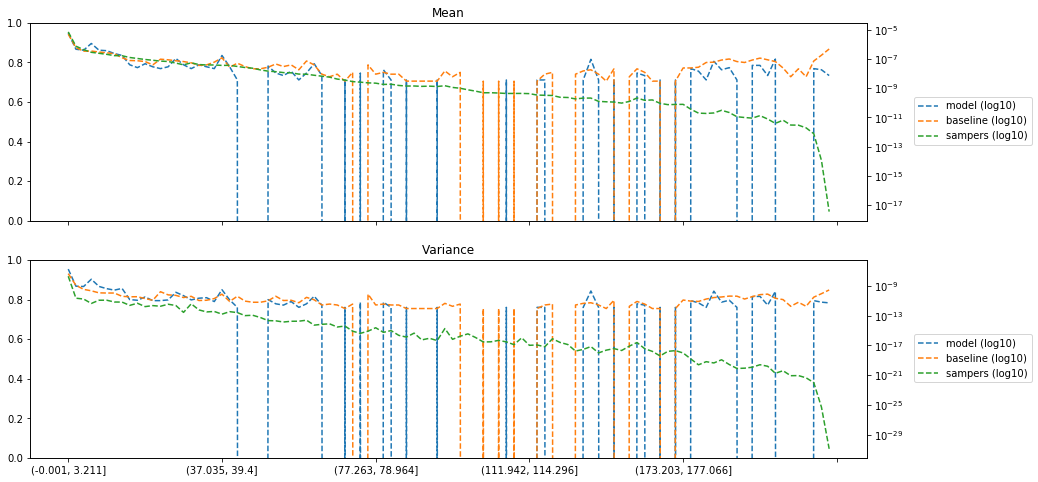

In [151]:
quick_eval("east", converted_visits, converted_baseline, home_locations, sampers)

removed 2959 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 0 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
3067 visits left after alignment
removed 2076 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 731 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
3502 visits left after alignment
5.8620980783243426e-15


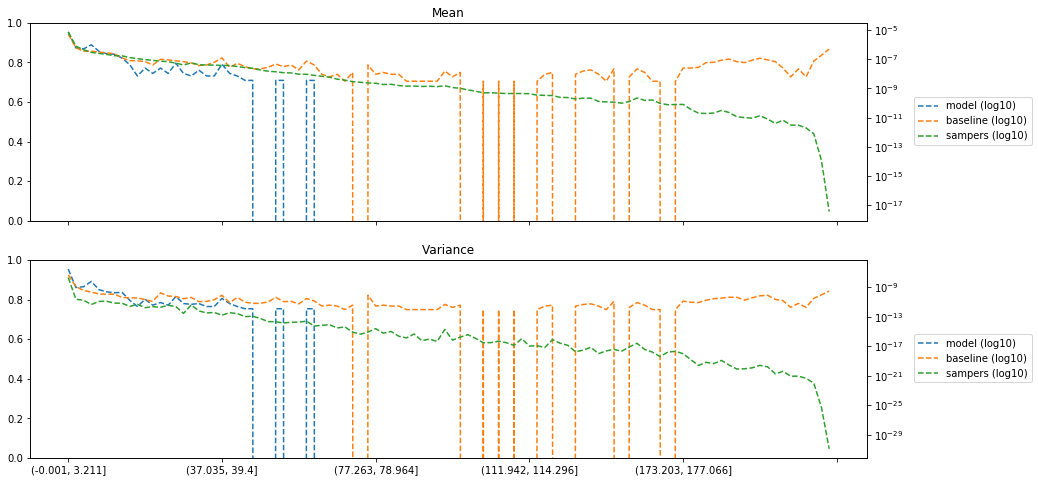

In [157]:
quick_eval("east", converted_visits, converted_baseline, home_locations, sampers)

removed 2878 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 0 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
2948 visits left after alignment
removed 2076 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 731 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
3502 visits left after alignment
9.030147725729004e-15


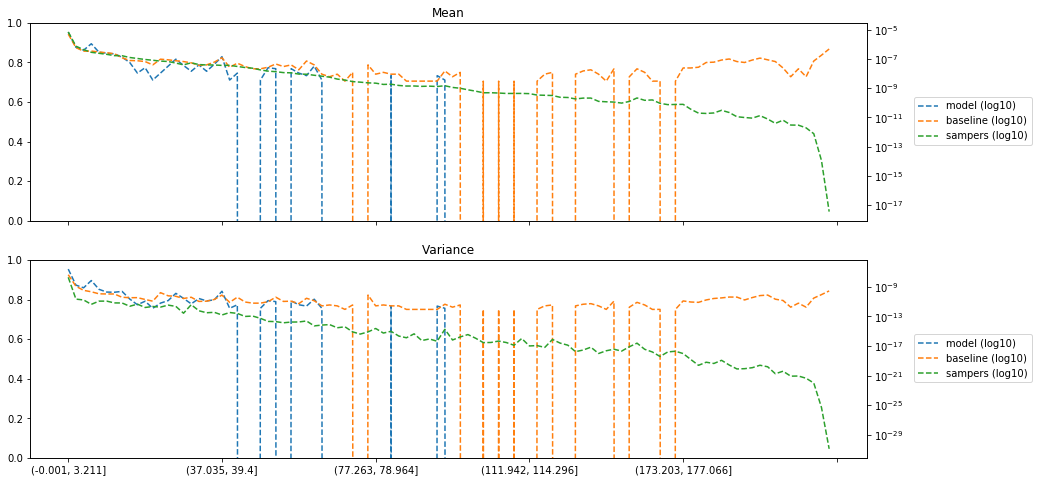

In [161]:
quick_eval("east", converted_visits, converted_baseline, home_locations, sampers)

removed 49391 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 0 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
69111 visits left after alignment
removed 32182 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 9085 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
47048 visits left after alignment
3.618724843303568e-15


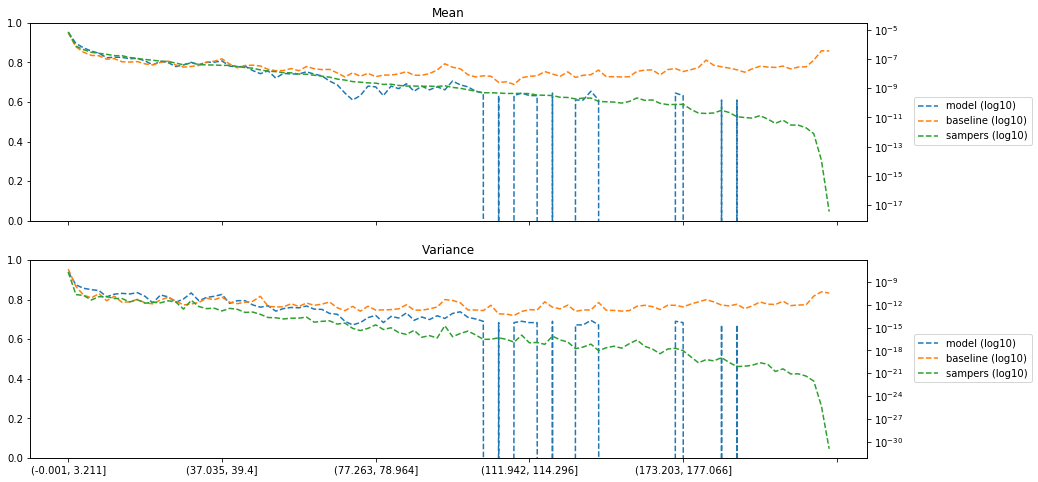

In [168]:
quick_eval("east", converted_visits, converted_baseline, home_locations, sampers)

removed 1200207 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 28 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
1095637 visits left after alignment
removed 670445 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 82836 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
536139 visits left after alignment
8.306993347209306e-16


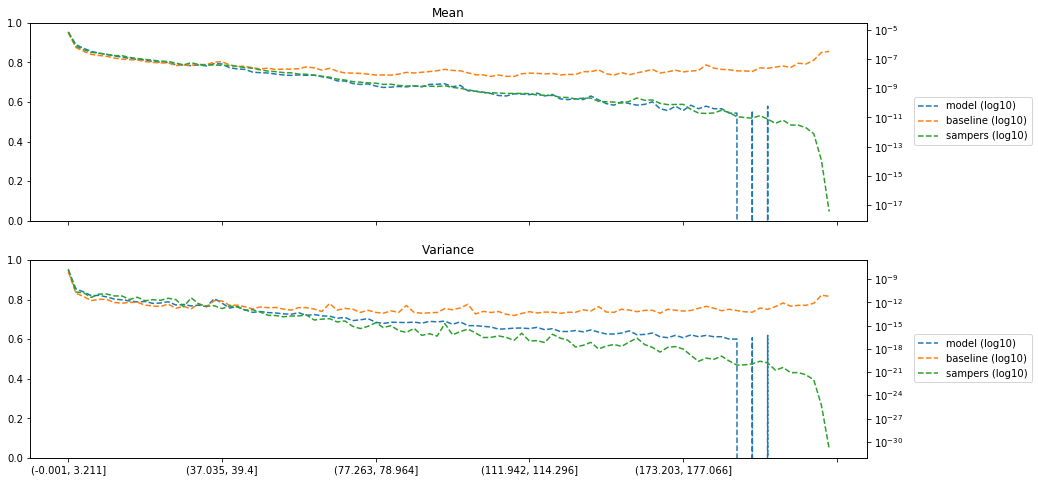

In [178]:
quick_eval("east", converted_visits, converted_baseline, home_locations, sampers)

## West

removed 101701 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 12 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
16789 visits left after alignment
removed 79434 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 2175 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
6706 visits left after alignment
8.5338932525916e-15


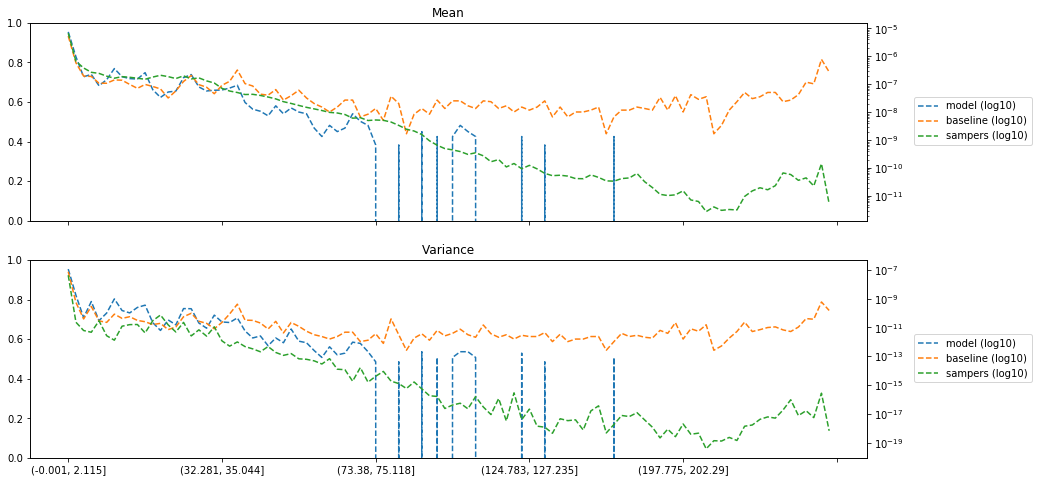

In [169]:
quick_eval("west", converted_visits, converted_baseline, home_locations, sampers)

removed 1866511 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 273 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
429088 visits left after alignment
removed 1046764 visits due to sampling bbox
Aligning region-visits to Sampers zones...
removed 27187 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
215469 visits left after alignment
1.6193506267838702e-15


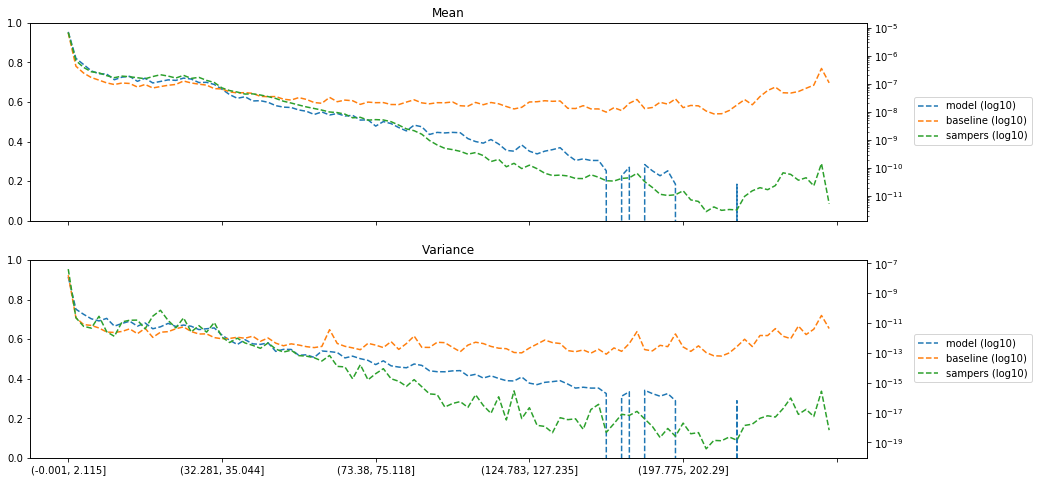

In [179]:
quick_eval("west", converted_visits, converted_baseline, home_locations, sampers)

In [182]:
visits.to_csv('./../../dbs/sweden/visits-transition-mx.csv')